In [1]:
import pandas as pd
from pandas_datareader import data, wb # This will import the data reader
import weightedcalcs as wc
import numpy as np

import matplotlib.pyplot as plt

fig_path = "C:\\Users\\mwaugh.NYC-STERN\\Documents\\GitHub\\EGB\\materials\\figures"

## Question \#1

In [2]:
codes = ["GDP" ,"A033RC1A027NBEA"] 
# nomial gdp, imports, imports from china, constant maturity 1 year rate, cip (no energy or food)

fred = data.DataReader(codes,"fred",1970)  # Then for fred, you hand it the codes
                                            # Tell it you want to ask from FRED
                                            # then tell it the start date

In [3]:
fred.head()

,GDP,A033RC1A027NBEA
DATE,,
1970-01-01,1051.200,623.347
1970-04-01,1067.375,NaN
1970-07-01,1086.059,NaN
1970-10-01,1088.608,NaN
1971-01-01,1135.156,664.995


In [4]:
fred["labor_share"] = (fred.A033RC1A027NBEA) / fred.GDP

This code "A041RC1A027NBEA" may be of interest

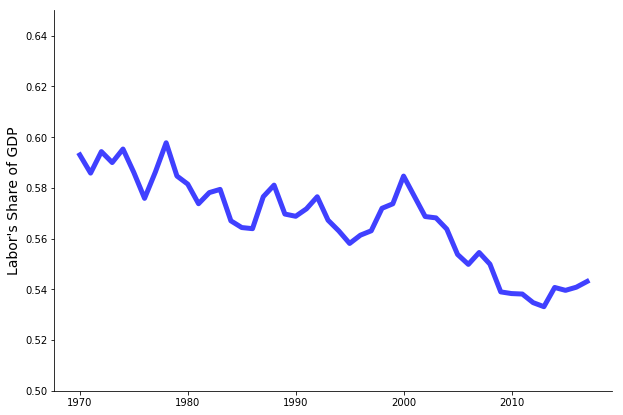

In [10]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(fred.dropna().labor_share, color = "blue",
        linewidth = 5, alpha = 0.75)

ax.set_ylim(0.50,0.65)

ax.set_ylabel("Labor's Share of GDP", fontsize = 14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [59]:
gdp = pd.DataFrame(fred["GDP"].resample("A", convention= 'end').sum())

labor_comp = pd.DataFrame(fred["A033RC1A027NBEA"].resample("A", convention= 'end').sum())

In [60]:
gdp_growth = (100*(np.log(gdp.loc["1979-12-31"]) - np.log(gdp.loc["1970-12-31"]) )/ 10)

gdp_growth = gdp_growth.append(100*(np.log(gdp.loc["1989-12-31"]) - np.log(gdp.loc["1980-12-31"]) )/ 10)

gdp_growth = gdp_growth.append(100*(np.log(gdp.loc["1999-12-31"]) - np.log(gdp.loc["1990-12-31"]) )/ 10)

gdp_growth = gdp_growth.append(100*(np.log(gdp.loc["2017-12-31"]) - np.log(gdp.loc["2000-12-31"]) )/ 10)

In [68]:
w_growth = (100*(np.log(labor_comp.loc["1979-12-31"]) - np.log(labor_comp.loc["1970-12-31"]) )/ 10)

w_growth = w_growth.append(100*(np.log(labor_comp.loc["1989-12-31"]) - np.log(labor_comp.loc["1980-12-31"]) )/ 10)

w_growth = w_growth.append(100*(np.log(labor_comp.loc["1999-12-31"]) - np.log(labor_comp.loc["1990-12-31"]) )/ 10)

w_growth = w_growth.append(100*(np.log(labor_comp.loc["2017-12-31"]) - np.log(labor_comp.loc["2000-12-31"]) )/ 10)

In [69]:
w_growth

A033RC1A027NBEA    8.628213
A033RC1A027NBEA    6.602835
A033RC1A027NBEA    4.808278
A033RC1A027NBEA    5.763871
dtype: float64

In [87]:
tabe_one = pd.concat([gdp_growth.reset_index(drop=True), w_growth.reset_index(drop=True)], axis = 1)

In [93]:
tabe_one.columns = ["GDP growth", "Labor Compensation"]

In [94]:
tabe_one

,GDP growth,Labor Compensation
0,8.952189,8.628213
1,6.802840,6.602835
2,4.793541,4.808278
3,6.421586,5.763871


## Question \#2

In [95]:
codes = ["CPILFESL" ,"GS1"] 
# nomial gdp, imports, imports from china, constant maturity 1 year rate, cip (no energy or food)

fred = data.DataReader(codes,"fred",1970)  # Then for fred, you hand it the codes
                                            # Tell it you want to ask from FRED
                                            # then tell it the start date

In [106]:
infl = pd.DataFrame(fred["CPILFESL"].resample("A", convention= 'end').mean())

nrate = pd.DataFrame(fred["GS1"].resample("A", convention= 'end').mean())

In [104]:
inflation = (100*(np.log(infl.loc["1979-12-31"]) - np.log(infl.loc["1970-12-31"]) )/ 10)

inflation = inflation.append(100*(np.log(infl.loc["1989-12-31"]) - np.log(infl.loc["1980-12-31"]) )/ 10)

inflation = inflation.append(100*(np.log(infl.loc["1999-12-31"]) - np.log(infl.loc["1990-12-31"]) )/ 10)

inflation = inflation.append(100*(np.log(infl.loc["2017-12-31"]) - np.log(infl.loc["2000-12-31"]) )/ 10)

In [105]:
inflation

CPILFESL    5.656061
CPILFESL    4.677833
CPILFESL    2.673444
CPILFESL    3.300191
dtype: float64

In [128]:
nominal_rate = nrate[nrate.index < "1980-12-31"].mean()

nominal_rate = nominal_rate.append(nrate[(("1980-12-31" < nrate.index) & (nrate.index < "1990-12-31"))].mean())

nominal_rate = nominal_rate.append(nrate[(("1990-12-31" < nrate.index) & (nrate.index < "2000-12-31"))].mean())

nominal_rate = nominal_rate.append(nrate[(("2000-12-31" < nrate.index) & (nrate.index < "2017-12-31"))].mean())

In [129]:
nominal_rate

GS1    6.995667
GS1    9.483704
GS1    5.079074
GS1    1.615156
dtype: float64

In [131]:
infl["log_cpi"] = np.log(infl["CPILFESL"])

In [134]:
infl["inflation_rate"] = 100.*infl.log_cpi.diff()

In [135]:
infl.head()

,CPILFESL,log_cpi,inflation_rate
DATE,,,
1970-12-31,40.816667,3.709090,NaN
1971-12-31,42.733333,3.754979,4.588876
1972-12-31,44.041667,3.785136,3.015690
1973-12-31,45.575000,3.819359,3.422317
1974-12-31,49.358333,3.899107,7.974729


In [136]:
tabe_two = pd.concat([infl, nrate], axis = 1)

In [138]:
tabe_two["real_rates"] = tabe_two["GS1"] - tabe_two["inflation_rate"]

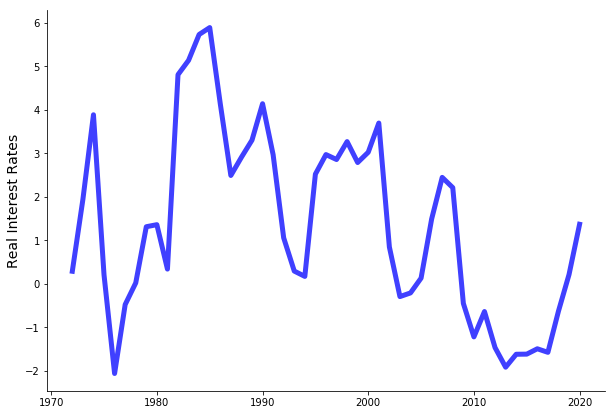

In [142]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(tabe_two["real_rates"], color = "blue",
        linewidth = 5, alpha = 0.75)

ax.set_ylabel("Real Interest Rates", fontsize = 14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()